In [1]:
import os
import pandas as pd
import json
import shutil
import numpy as np
import cv2
from clahe import CLAHE, convert_dir_to_clahe
%matplotlib inline
%load_ext autoreload
%autoreload 2


In [2]:
from loaddata import *
from exporter import *

In [3]:
exporter = Exporter()

In [4]:
df = load_merged()

In [5]:
df[df["category_id"] == 78]

,id,image_id,category_id,name,seq_num_frames,location,datetime,seq_id,width,height,file_name,sub_location,seq_frame_num,detections,max_detection_conf,nr_boxes
114545,9eec097e-21bc-11ea-a13a-137349068a90,87faf93c-21bc-11ea-a13a-137349068a90,78,papio anubis,9,130,2013-01-17 11:28:58.000,97ef9cbc-21bc-11ea-a13a-137349068a90,1280,1024,87faf93c-21bc-11ea-a13a-137349068a90.jpg,NaN,0,"[{'category': '1', 'bbox': [0.4612, 0.7422, 0....",0.999,1
114546,9c609c7e-21bc-11ea-a13a-137349068a90,8ccf18d0-21bc-11ea-a13a-137349068a90,78,papio anubis,9,130,2013-01-17 11:28:59.000,97ef9cbc-21bc-11ea-a13a-137349068a90,1280,1024,8ccf18d0-21bc-11ea-a13a-137349068a90.jpg,NaN,1,"[{'category': '1', 'bbox': [0.3614, 0.7365, 0....",0.996,1
114547,9e9154de-21bc-11ea-a13a-137349068a90,884dfbdc-21bc-11ea-a13a-137349068a90,78,papio anubis,9,130,2013-01-17 11:29:00.000,97ef9cbc-21bc-11ea-a13a-137349068a90,1280,1024,884dfbdc-21bc-11ea-a13a-137349068a90.jpg,NaN,2,"[{'category': '1', 'bbox': [0.2982, 0.7377, 0....",0.999,1
114548,9da63ee0-21bc-11ea-a13a-137349068a90,8d72356a-21bc-11ea-a13a-137349068a90,78,papio anubis,9,130,2013-01-17 11:29:32.000,97ef9cbc-21bc-11ea-a13a-137349068a90,1280,1024,8d72356a-21bc-11ea-a13a-137349068a90.jpg,NaN,3,"[{'category': '1', 'bbox': [0.0329, 0.8052, 0....",1.000,1
114549,9a5e635c-21bc-11ea-a13a-137349068a90,95a01f9a-21bc-11ea-a13a-137349068a90,78,papio anubis,9,130,2013-01-17 11:29:33.000,97ef9cbc-21bc-11ea-a13a-137349068a90,1280,1024,95a01f9a-21bc-11ea-a13a-137349068a90.jpg,NaN,4,"[{'category': '1', 'bbox': [0.0, 0.8448, 0.065...",0.793,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115086,9febdc82-21bc-11ea-a13a-137349068a90,91599402-21bc-11ea-a13a-137349068a90,78,papio anubis,3,73,2015-02-19 11:24:17.000,915995ce-21bc-11ea-a13a-137349068a90,1280,720,91599402-21bc-11ea-a13a-137349068a90.jpg,NaN,1,"[{'category': '1', 'bbox': [0.2583, 0.1336, 0....",1.000,1
115087,9fcdf32a-21bc-11ea-a13a-137349068a90,90826496-21bc-11ea-a13a-137349068a90,78,papio anubis,3,73,2015-02-19 11:24:18.000,915995ce-21bc-11ea-a13a-137349068a90,1280,720,90826496-21bc-11ea-a13a-137349068a90.jpg,NaN,2,"[{'category': '1', 'bbox': [0.1982, 0.1395, 0....",1.000,1
115088,9bcdf22a-21bc-11ea-a13a-137349068a90,97832eb0-21bc-11ea-a13a-137349068a90,78,papio anubis,3,383,2015-01-31 14:47:31.000,97832fc8-21bc-11ea-a13a-137349068a90,1280,1024,97832eb0-21bc-11ea-a13a-137349068a90.jpg,NaN,0,"[{'category': '1', 'bbox': [0.1118, 0.4956, 0....",1.000,1
115089,a0bde038-21bc-11ea-a13a-137349068a90,8d957f7a-21bc-11ea-a13a-137349068a90,78,papio anubis,3,383,2015-01-31 14:47:32.000,97832fc8-21bc-11ea-a13a-137349068a90,1280,1024,8d957f7a-21bc-11ea-a13a-137349068a90.jpg,NaN,1,"[{'category': '1', 'bbox': [0.0, 0.4442, 0.270...",0.995,1


In [6]:
basedir = "moredata"
os.listdir("moredata")

['inat2018.json',
 'inaturalist_2018',
 'inat2017.json',
 'inaturalist_2018_to_iwildcam_train.json',
 'inaturalist_2017',
 'iwildcam_random_baseline.csv',
 'iwildcam_2018_sample_submission.csv',
 'iwildcam2018_sample_submission.csv',
 'inaturalist_2017_to_iwildcam_train.json']

In [7]:
ANNOTATIONS_PATH = "metadata/"
SIZES = [(256,256), (380,380)]
DESTDIR = "inaturalist/"
DESTDIR_CLAHE = "inaturalist_clahe/"
if not os.path.exists(DESTDIR):
    os.makedirs(DESTDIR)

In [8]:
IN2017 = os.path.join(basedir, "inaturalist_2017")
IN2018 = os.path.join(basedir, "inaturalist_2018")
IN2017T = os.path.join(basedir, "inaturalist_2017_to_iwildcam_train.json")
IN2018T = os.path.join(basedir, "inaturalist_2018_to_iwildcam_train.json")
IN2017BOX = os.path.join(basedir, "inat2017.json")
IN2018BOX = os.path.join(basedir, "inat2018.json")

In [9]:
os.listdir(os.path.join(IN2018, "Aves","3226"))

['a7fcc187a07260c7f7fb03b088dadbbc.jpg',
 '4981c8ab455e7836459e3d56c708a8b5.jpg',
 'af7b57c6499383076cdc5526a6395867.jpg',
 '89a6018c007971f478b67a1f9ab8872a.jpg',
 '8ba01699f0beb1657d49b03de958ec9d.jpg',
 '663c338a8de9bbe8cc156fffec812ad0.jpg',
 '5fe8347495f99447bc30f5363cb38d16.jpg',
 'cfc5e3114650f61f7827187884ae5fac.jpg',
 'e1dd299987aea1e66abed0c5ff58648e.jpg',
 'f28ba7cd85702c601e01deef0f8e5512.jpg',
 '611a6c0fb567f8fbcc89ec20e6c814a9.jpg',
 '04f0572920cde17435f77b2ae650b0ce.jpg',
 '38f06cac5950623960eff52053fc71a3.jpg',
 '5e662d156e3fbfbc1b7cbb160f41a9cb.jpg',
 'fa3daf152ecb8534241547611228dacc.jpg',
 '4db6f9f3f2b3b126d7d01f7285367716.jpg',
 '95e2a19dd0e3f603bdc22b97a808f4d5.jpg',
 '4ab125dbc39ab8f7ab6f26e7edbeb979.jpg',
 'cbef4a50f0c952381b4d542b3ab995e4.jpg',
 'e0a7fee226c33df3141ae55d1ef3c553.jpg',
 '2258bd6ce7fe8926ced0ec1bf1371f4f.jpg',
 '2337d7d1286e2efb56186a0d93d9a4e3.jpg']

In [10]:
import csv
with open(IN2017T, newline='') as csvfile:
    inat2017 = json.load(csvfile)
with open(IN2018T, newline='') as csvfile:
    inat2018 = json.load(csvfile)

In [11]:
train_annotations_seq = inat2017["images"][94:104]


In [12]:
train_annotations_seq

[{'license': 3,
  'file_name': 'inaturalist_2017/Aves/Meleagris ocellata/dbeca57614c970c6716a508cba0f2bc0.jpg',
  'rights_holder': 'manuel92',
  'height': 600,
  'width': 800,
  'id': 122376},
 {'license': 3,
  'file_name': 'inaturalist_2017/Aves/Meleagris ocellata/cc9d753b9c54326672a5b3ecd7936c9b.jpg',
  'rights_holder': 'appleslothz',
  'height': 533,
  'width': 800,
  'id': 122377},
 {'license': 3,
  'file_name': 'inaturalist_2017/Aves/Meleagris ocellata/e913e05b96662eed53a876d565635885.jpg',
  'rights_holder': 'nuvia',
  'height': 600,
  'width': 800,
  'id': 122378},
 {'license': 3,
  'file_name': 'inaturalist_2017/Aves/Meleagris ocellata/3dcf68fa20f5772ffdc73ec09340b8f2.jpg',
  'rights_holder': 'manuel92',
  'height': 600,
  'width': 800,
  'id': 122382},
 {'license': 3,
  'file_name': 'inaturalist_2017/Aves/Meleagris ocellata/f5e7ff62e22a6a3996ad32abc76d00b7.jpg',
  'rights_holder': 'manuel92',
  'height': 600,
  'width': 800,
  'id': 122383},
 {'license': 3,
  'file_name': 'ina

In [13]:
import matplotlib.pyplot as plt
from PIL import Image

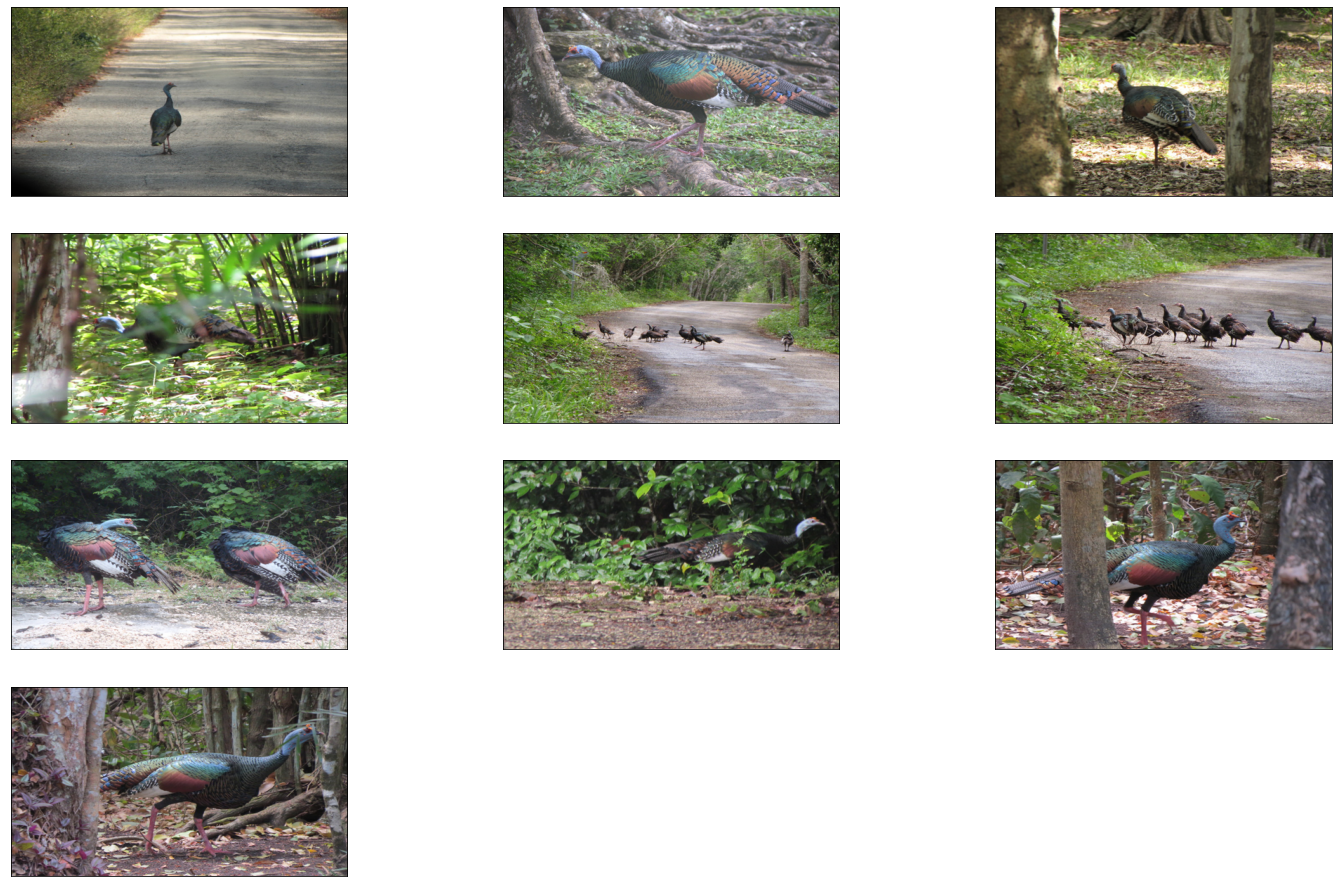

In [14]:
train_images_seq = [(basedir + "/" +item["file_name"]) for item in train_annotations_seq]
img_array = []
size = (480,270)

fig = plt.figure(figsize=(25, 16))
for i,im_path in enumerate(train_images_seq):
    ax = fig.add_subplot(4, 3, i+1, xticks=[], yticks=[])
    im = Image.open(im_path)
    im = im.resize(size)
    plt.imshow(im)
    
    img_array.append(im)

In [15]:
with open(IN2017BOX, newline='') as csvfile:
    inat2017box = json.load(csvfile)

In [16]:
names = df["name"].unique()

In [17]:
names = sorted(names)
names

['acinonyx jubatus',
 'acryllium vulturinum',
 'aepyceros melampus',
 'agouti paca',
 'aguila sp',
 'alcelaphus buselaphus',
 'alopochen aegyptiaca',
 'andropadus latirostris',
 'andropadus virens',
 'aramides cajanea',
 'aramus guarauna',
 'arborophila rubrirostris',
 'arctonyx hoevenii',
 'ardeotis kori',
 'argusianus argus',
 'atherurus africanus',
 'ave desconocida',
 'bos taurus',
 'brotogeris sp',
 'burhinus capensis',
 'callosciurus notatus',
 'camelus dromedarius',
 'canis adustus',
 'canis familiaris',
 'canis latrans',
 'canis lupus',
 'canis mesomelas',
 'capra aegagrus',
 'capricornis sumatraensis',
 'caracal caracal',
 'cephalophus nigrifrons',
 'cephalophus silvicultor',
 'cercopithecus lhoesti',
 'cercopithecus mitis',
 'cerdocyon thous',
 'chalcophaps indica',
 'chlorocebus pygerythrus',
 'claravis pretiosa',
 'collocalia linchi',
 'colomys goslingi',
 'conepatus semistriatus',
 'crax rubra',
 'cricetomys gambianus',
 'crocuta crocuta',
 'cuniculus paca',
 'cuon alpinus

In [18]:
res = {}
for im in inat2017["images"]:
    res[im["file_name"]] = im

In [19]:
categories = {}
for c in inat2017["annotations"]:
    categories[c["image_id"]] = c["category_id"]


In [20]:
res

{'inaturalist_2017/Mammalia/Papio anubis/df40033fdbde031e98f27e822e7dce29.jpg': {'license': 3,
  'file_name': 'inaturalist_2017/Mammalia/Papio anubis/df40033fdbde031e98f27e822e7dce29.jpg',
  'rights_holder': 'blaircostelloe',
  'height': 533,
  'width': 800,
  'id': 94343},
 'inaturalist_2017/Mammalia/Papio anubis/3b3aa628646e40625c7a92aa279b2aa3.jpg': {'license': 3,
  'file_name': 'inaturalist_2017/Mammalia/Papio anubis/3b3aa628646e40625c7a92aa279b2aa3.jpg',
  'rights_holder': 'blaircostelloe',
  'height': 533,
  'width': 800,
  'id': 94344},
 'inaturalist_2017/Mammalia/Papio anubis/8ae2d1514a6e2154a60aef545389f44b.jpg': {'license': 3,
  'file_name': 'inaturalist_2017/Mammalia/Papio anubis/8ae2d1514a6e2154a60aef545389f44b.jpg',
  'rights_holder': 'blaircostelloe',
  'height': 601,
  'width': 800,
  'id': 94345},
 'inaturalist_2017/Mammalia/Papio anubis/9e58e4f36d81880e2945b00cf5b50606.jpg': {'license': 3,
  'file_name': 'inaturalist_2017/Mammalia/Papio anubis/9e58e4f36d81880e2945b00cf

In [21]:
for im in inat2017box["images"]:
    fn = "/".join(im["file"].split("/")[1:])
    #rint(inat2017["images"])
    print(categories[res[fn]["id"]])
    print(im)
    #category = im["file"].split("/")[3]
    #if(category.lower() not in names):
    #    print("Break",category)
    break

296
{'file': 'inat2017/inaturalist_2017/Reptilia/Varanus salvator/3a212ab1c430dbadfa4812605b0fe9c7.jpg', 'max_detection_conf': 0.999, 'detections': [{'category': '1', 'conf': 0.999, 'bbox': [0.06031, 0.3864, 0.6924, 0.3316]}]}


In [22]:
def as_dataframe(inat):
    df_images = pd.DataFrame(inat["images"]).rename({"id" : "image_id"}, axis=1)
    df_annotations = pd.DataFrame(inat["annotations"])
    df_res = pd.merge(df_images, df_annotations, on="image_id")
    return df_res
df_inat2017 = as_dataframe(inat2017)
df_inat2018 = as_dataframe(inat2018)
df_inat2017.head()

,license,file_name,rights_holder,height,width,image_id,category_id,id
0,3,inaturalist_2017/Mammalia/Papio anubis/df40033...,blaircostelloe,533,800,94343,78,94343
1,3,inaturalist_2017/Mammalia/Papio anubis/3b3aa62...,blaircostelloe,533,800,94344,78,94344
2,3,inaturalist_2017/Mammalia/Papio anubis/8ae2d15...,blaircostelloe,601,800,94345,78,94345
3,3,inaturalist_2017/Mammalia/Papio anubis/9e58e4f...,blaircostelloe,533,800,94347,78,94347
4,3,inaturalist_2017/Mammalia/Papio anubis/5a19154...,Martin Grimm,533,800,94348,78,94348


In [23]:
df_inat2017.head()

,license,file_name,rights_holder,height,width,image_id,category_id,id
0,3,inaturalist_2017/Mammalia/Papio anubis/df40033...,blaircostelloe,533,800,94343,78,94343
1,3,inaturalist_2017/Mammalia/Papio anubis/3b3aa62...,blaircostelloe,533,800,94344,78,94344
2,3,inaturalist_2017/Mammalia/Papio anubis/8ae2d15...,blaircostelloe,601,800,94345,78,94345
3,3,inaturalist_2017/Mammalia/Papio anubis/9e58e4f...,blaircostelloe,533,800,94347,78,94347
4,3,inaturalist_2017/Mammalia/Papio anubis/5a19154...,Martin Grimm,533,800,94348,78,94348


In [24]:
def xpand(df):
    df["image_id"] = df["file_name"].apply(lambda x : os.path.splitext(os.path.basename(x))[0])
    return df

In [25]:
df_inat2017 = xpand(df_inat2017)
df_inat2018 = xpand(df_inat2018)
df_inat2017.head()

,license,file_name,rights_holder,height,width,image_id,category_id,id
0,3,inaturalist_2017/Mammalia/Papio anubis/df40033...,blaircostelloe,533,800,df40033fdbde031e98f27e822e7dce29,78,94343
1,3,inaturalist_2017/Mammalia/Papio anubis/3b3aa62...,blaircostelloe,533,800,3b3aa628646e40625c7a92aa279b2aa3,78,94344
2,3,inaturalist_2017/Mammalia/Papio anubis/8ae2d15...,blaircostelloe,601,800,8ae2d1514a6e2154a60aef545389f44b,78,94345
3,3,inaturalist_2017/Mammalia/Papio anubis/9e58e4f...,blaircostelloe,533,800,9e58e4f36d81880e2945b00cf5b50606,78,94347
4,3,inaturalist_2017/Mammalia/Papio anubis/5a19154...,Martin Grimm,533,800,5a191548f8357c2579ae0b5d4ec547f4,78,94348


In [26]:
base = DESTDIR
convert_dir_to_clahe(base)

FileExistsError: [Errno 17] File exists: 'inaturalist/_clahe'

In [27]:
with open(IN2017T, newline='') as csvfile:
    inat2017 = json.load(csvfile)

In [28]:
# megadetector4
print(IN2017BOX)
df_train_2017_md4 = load_md4(IN2017BOX)
df_train_2017_md4 = df_train_2017_md4.merge(df_inat2017, on="image_id")
df_train_2017_md4.head()

moredata/inat2017.json


,file,max_detection_conf,detections,short,image_id,nr_boxes,license,file_name,rights_holder,height,width,category_id,id
0,inat2017/inaturalist_2017/Reptilia/Varanus sal...,0.999,"[{'category': '1', 'conf': 0.999, 'bbox': [0.0...",3a212ab1c430dbadfa4812605b0fe9c7.jpg,3a212ab1c430dbadfa4812605b0fe9c7,1,1,inaturalist_2017/Reptilia/Varanus salvator/3a2...,csavy,600,800,296,334086
1,inat2017/inaturalist_2017/Reptilia/Varanus sal...,0.984,"[{'category': '1', 'conf': 0.984, 'bbox': [0.3...",d4e879053fd5d69d8187e99b25ab230b.jpg,d4e879053fd5d69d8187e99b25ab230b,2,1,inaturalist_2017/Reptilia/Varanus salvator/d4e...,csavy,600,800,296,334091
2,inat2017/inaturalist_2017/Reptilia/Varanus sal...,0.989,"[{'category': '1', 'conf': 0.989, 'bbox': [0.0...",d28de120e0179e97e3636f1f4a4eb47d.jpg,d28de120e0179e97e3636f1f4a4eb47d,4,3,inaturalist_2017/Reptilia/Varanus salvator/d28...,budak,534,800,296,623955
3,inat2017/inaturalist_2017/Reptilia/Varanus sal...,0.999,"[{'category': '1', 'conf': 0.999, 'bbox': [0.0...",2671d59abb97302cc48748b83ff5e8b5.jpg,2671d59abb97302cc48748b83ff5e8b5,1,1,inaturalist_2017/Reptilia/Varanus salvator/267...,csavy,600,800,296,334085
4,inat2017/inaturalist_2017/Reptilia/Varanus sal...,0.388,"[{'category': '1', 'conf': 0.388, 'bbox': [0.1...",5a3153a0dcbda6d090d90da9bacb8658.jpg,5a3153a0dcbda6d090d90da9bacb8658,1,1,inaturalist_2017/Reptilia/Varanus salvator/5a3...,Subhajit Roy,325,800,296,334078


In [29]:
df_train_2017_md4["file"][40:].tail()

7650    inat2017/inaturalist_2017/Aves/Catharus ustula...
7651    inat2017/inaturalist_2017/Aves/Catharus ustula...
7652    inat2017/inaturalist_2017/Aves/Catharus ustula...
7653    inat2017/inaturalist_2017/Aves/Catharus ustula...
7654    inat2017/inaturalist_2017/Aves/Catharus ustula...
Name: file, dtype: object

In [30]:
# megadetector4
df_train_2018_md4 = load_md4(IN2018BOX)
df_train_2018_md4 = df_train_2018_md4.merge(df_inat2018, on="image_id")
df_train_2018_md4.tail()

,file,max_detection_conf,detections,short,image_id,nr_boxes,license,file_name,rights_holder,height,width,category_id,id
5391,inat2018/inaturalist_2018/Aves/3730/3bea9aec6d...,0.999,"[{'category': '1', 'conf': 0.999, 'bbox': [0.2...",3bea9aec6de524adf0a3cab441fb6c2a.jpg,3bea9aec6de524adf0a3cab441fb6c2a,2,3,inaturalist_2018/Aves/3730/3bea9aec6de524adf0a...,greivin,450,800,657,317837
5392,inat2018/inaturalist_2018/Aves/3730/fffb2a30d2...,0.998,"[{'category': '1', 'conf': 0.998, 'bbox': [0.4...",fffb2a30d2da1becf85c25ec64fe9525.jpg,fffb2a30d2da1becf85c25ec64fe9525,4,3,inaturalist_2018/Aves/3730/fffb2a30d2da1becf85...,Donna Pomeroy,533,800,657,257148
5393,inat2018/inaturalist_2018/Aves/3730/e6d5aa3d2c...,0.997,"[{'category': '1', 'conf': 0.997, 'bbox': [0.4...",e6d5aa3d2c24960fbfa323e8cf4f5bf3.jpg,e6d5aa3d2c24960fbfa323e8cf4f5bf3,1,3,inaturalist_2018/Aves/3730/e6d5aa3d2c24960fbfa...,Marv Elliott,536,800,657,290013
5394,inat2018/inaturalist_2018/Aves/3730/547d609a81...,0.984,"[{'category': '1', 'conf': 0.984, 'bbox': [0.3...",547d609a81466d5d34c8e91642c75734.jpg,547d609a81466d5d34c8e91642c75734,2,3,inaturalist_2018/Aves/3730/547d609a81466d5d34c...,Carmelo López Abad,707,800,657,225713
5395,inat2018/inaturalist_2018/Aves/3730/59f8950340...,0.987,"[{'category': '1', 'conf': 0.987, 'bbox': [0.2...",59f89503404bc2a94a9b7225c75b9e4c.jpg,59f89503404bc2a94a9b7225c75b9e4c,5,3,inaturalist_2018/Aves/3730/59f89503404bc2a94a9...,jokurtz,533,800,657,252193


In [31]:
# we add the path to the dataframe (copied from 00)
def add_path(df, path):
    out = df.copy()
    out["filename"] = df["image_id"].apply(lambda x: os.path.join(path, x + ".jpg"))
    out["path"] = path
    return out

df_train_2017_md4 = add_path(df_train_2017_md4, DESTDIR)
df_train_2017_md4_clahe = add_path(df_train_2017_md4, DESTDIR_CLAHE)
df_train_2018_md4 = add_path(df_train_2018_md4, DESTDIR)
df_train_2018_md4_clahe = add_path(df_train_2018_md4, DESTDIR_CLAHE)

In [32]:
df_train_2018_md4_clahe.head()

,file,max_detection_conf,detections,short,image_id,nr_boxes,license,file_name,rights_holder,height,width,category_id,id,filename,path
0,inat2018/inaturalist_2018/Mammalia/4198/c489e9...,0.998,"[{'category': '1', 'conf': 0.998, 'bbox': [0.2...",c489e9fe87f3f881ffe68d0d3b2264e6.jpg,c489e9fe87f3f881ffe68d0d3b2264e6,2,3,inaturalist_2018/Mammalia/4198/c489e9fe87f3f88...,Frank Izaguirre,614,800,376,360184,inaturalist_clahe/c489e9fe87f3f881ffe68d0d3b22...,inaturalist_clahe/
1,inat2018/inaturalist_2018/Mammalia/4198/bba16e...,0.751,"[{'category': '1', 'conf': 0.751, 'bbox': [0.4...",bba16ec69691a02027e8ce1775dbb21b.jpg,bba16ec69691a02027e8ce1775dbb21b,3,2,inaturalist_2018/Mammalia/4198/bba16ec69691a02...,Arnoldo Villaseñor,600,800,376,196593,inaturalist_clahe/bba16ec69691a02027e8ce1775db...,inaturalist_clahe/
2,inat2018/inaturalist_2018/Mammalia/4198/e2de75...,0.999,"[{'category': '1', 'conf': 0.999, 'bbox': [0.0...",e2de751ebf08e7855fc2fa53eda0f139.jpg,e2de751ebf08e7855fc2fa53eda0f139,1,3,inaturalist_2018/Mammalia/4198/e2de751ebf08e78...,codyschank,450,800,376,6759,inaturalist_clahe/e2de751ebf08e7855fc2fa53eda0...,inaturalist_clahe/
3,inat2018/inaturalist_2018/Mammalia/4198/120be2...,0.999,"[{'category': '1', 'conf': 0.999, 'bbox': [0.0...",120be263834c49ec63841db88a75b1cd.jpg,120be263834c49ec63841db88a75b1cd,3,2,inaturalist_2018/Mammalia/4198/120be263834c49e...,Arnoldo Villaseñor,450,800,376,384029,inaturalist_clahe/120be263834c49ec63841db88a75...,inaturalist_clahe/
4,inat2018/inaturalist_2018/Mammalia/4198/fe0e67...,0.962,"[{'category': '1', 'conf': 0.962, 'bbox': [0.3...",fe0e67e386cf6c6a1fa645aafbfc0f9f.jpg,fe0e67e386cf6c6a1fa645aafbfc0f9f,3,2,inaturalist_2018/Mammalia/4198/fe0e67e386cf6c6...,Arnoldo Villaseñor,600,800,376,186772,inaturalist_clahe/fe0e67e386cf6c6a1fa645aafbfc...,inaturalist_clahe/


In [33]:
df_train_2018_md4.head()

,file,max_detection_conf,detections,short,image_id,nr_boxes,license,file_name,rights_holder,height,width,category_id,id,filename,path
0,inat2018/inaturalist_2018/Mammalia/4198/c489e9...,0.998,"[{'category': '1', 'conf': 0.998, 'bbox': [0.2...",c489e9fe87f3f881ffe68d0d3b2264e6.jpg,c489e9fe87f3f881ffe68d0d3b2264e6,2,3,inaturalist_2018/Mammalia/4198/c489e9fe87f3f88...,Frank Izaguirre,614,800,376,360184,inaturalist/c489e9fe87f3f881ffe68d0d3b2264e6.jpg,inaturalist/
1,inat2018/inaturalist_2018/Mammalia/4198/bba16e...,0.751,"[{'category': '1', 'conf': 0.751, 'bbox': [0.4...",bba16ec69691a02027e8ce1775dbb21b.jpg,bba16ec69691a02027e8ce1775dbb21b,3,2,inaturalist_2018/Mammalia/4198/bba16ec69691a02...,Arnoldo Villaseñor,600,800,376,196593,inaturalist/bba16ec69691a02027e8ce1775dbb21b.jpg,inaturalist/
2,inat2018/inaturalist_2018/Mammalia/4198/e2de75...,0.999,"[{'category': '1', 'conf': 0.999, 'bbox': [0.0...",e2de751ebf08e7855fc2fa53eda0f139.jpg,e2de751ebf08e7855fc2fa53eda0f139,1,3,inaturalist_2018/Mammalia/4198/e2de751ebf08e78...,codyschank,450,800,376,6759,inaturalist/e2de751ebf08e7855fc2fa53eda0f139.jpg,inaturalist/
3,inat2018/inaturalist_2018/Mammalia/4198/120be2...,0.999,"[{'category': '1', 'conf': 0.999, 'bbox': [0.0...",120be263834c49ec63841db88a75b1cd.jpg,120be263834c49ec63841db88a75b1cd,3,2,inaturalist_2018/Mammalia/4198/120be263834c49e...,Arnoldo Villaseñor,450,800,376,384029,inaturalist/120be263834c49ec63841db88a75b1cd.jpg,inaturalist/
4,inat2018/inaturalist_2018/Mammalia/4198/fe0e67...,0.962,"[{'category': '1', 'conf': 0.962, 'bbox': [0.3...",fe0e67e386cf6c6a1fa645aafbfc0f9f.jpg,fe0e67e386cf6c6a1fa645aafbfc0f9f,3,2,inaturalist_2018/Mammalia/4198/fe0e67e386cf6c6...,Arnoldo Villaseñor,600,800,376,186772,inaturalist/fe0e67e386cf6c6a1fa645aafbfc0f9f.jpg,inaturalist/


In [34]:
df_train_2017_md4_clahe.head()

,file,max_detection_conf,detections,short,image_id,nr_boxes,license,file_name,rights_holder,height,width,category_id,id,filename,path
0,inat2017/inaturalist_2017/Reptilia/Varanus sal...,0.999,"[{'category': '1', 'conf': 0.999, 'bbox': [0.0...",3a212ab1c430dbadfa4812605b0fe9c7.jpg,3a212ab1c430dbadfa4812605b0fe9c7,1,1,inaturalist_2017/Reptilia/Varanus salvator/3a2...,csavy,600,800,296,334086,inaturalist_clahe/3a212ab1c430dbadfa4812605b0f...,inaturalist_clahe/
1,inat2017/inaturalist_2017/Reptilia/Varanus sal...,0.984,"[{'category': '1', 'conf': 0.984, 'bbox': [0.3...",d4e879053fd5d69d8187e99b25ab230b.jpg,d4e879053fd5d69d8187e99b25ab230b,2,1,inaturalist_2017/Reptilia/Varanus salvator/d4e...,csavy,600,800,296,334091,inaturalist_clahe/d4e879053fd5d69d8187e99b25ab...,inaturalist_clahe/
2,inat2017/inaturalist_2017/Reptilia/Varanus sal...,0.989,"[{'category': '1', 'conf': 0.989, 'bbox': [0.0...",d28de120e0179e97e3636f1f4a4eb47d.jpg,d28de120e0179e97e3636f1f4a4eb47d,4,3,inaturalist_2017/Reptilia/Varanus salvator/d28...,budak,534,800,296,623955,inaturalist_clahe/d28de120e0179e97e3636f1f4a4e...,inaturalist_clahe/
3,inat2017/inaturalist_2017/Reptilia/Varanus sal...,0.999,"[{'category': '1', 'conf': 0.999, 'bbox': [0.0...",2671d59abb97302cc48748b83ff5e8b5.jpg,2671d59abb97302cc48748b83ff5e8b5,1,1,inaturalist_2017/Reptilia/Varanus salvator/267...,csavy,600,800,296,334085,inaturalist_clahe/2671d59abb97302cc48748b83ff5...,inaturalist_clahe/
4,inat2017/inaturalist_2017/Reptilia/Varanus sal...,0.388,"[{'category': '1', 'conf': 0.388, 'bbox': [0.1...",5a3153a0dcbda6d090d90da9bacb8658.jpg,5a3153a0dcbda6d090d90da9bacb8658,1,1,inaturalist_2017/Reptilia/Varanus salvator/5a3...,Subhajit Roy,325,800,296,334078,inaturalist_clahe/5a3153a0dcbda6d090d90da9bacb...,inaturalist_clahe/


In [35]:
LOWER_THRESHOLD = 0.5

In [36]:
#boxes_train_2017_md4 = exporter.export_detections(df_train_2017_md4, "2017_md4", (256,256))
#exporter.to_csv()

#boxes_train_2018_md4 = exporter.export_detections(df_train_2018_md4, "2018_md4",(256,256))
#exporter.to_csv()

boxes_train_2017_md4_clahe = exporter.export_detections(df_train_2017_md4_clahe, "2017_md4", (256,256))
exporter.to_csv()

boxes_train_2018_md4_clahe = exporter.export_detections(df_train_2018_md4_clahe, "2018_md4",(256,256))
exporter.to_csv()

In [358]:
df_train_2018_md4.head()

,file,max_detection_conf,detections,image_id,nr_boxes,filename,path
0,inat2018/inaturalist_2018/Mammalia/4198/c489e9...,0.998,"[{'category': '1', 'conf': 0.998, 'bbox': [0.2...",c489e9fe87f3f881ffe68d0d3b2264e6,2,inaturalist/c489e9fe87f3f881ffe68d0d3b2264e6.jpg,inaturalist/
1,inat2018/inaturalist_2018/Mammalia/4198/bba16e...,0.751,"[{'category': '1', 'conf': 0.751, 'bbox': [0.4...",bba16ec69691a02027e8ce1775dbb21b,3,inaturalist/bba16ec69691a02027e8ce1775dbb21b.jpg,inaturalist/
2,inat2018/inaturalist_2018/Mammalia/4198/e2de75...,0.999,"[{'category': '1', 'conf': 0.999, 'bbox': [0.0...",e2de751ebf08e7855fc2fa53eda0f139,1,inaturalist/e2de751ebf08e7855fc2fa53eda0f139.jpg,inaturalist/
3,inat2018/inaturalist_2018/Mammalia/4198/120be2...,0.999,"[{'category': '1', 'conf': 0.999, 'bbox': [0.0...",120be263834c49ec63841db88a75b1cd,3,inaturalist/120be263834c49ec63841db88a75b1cd.jpg,inaturalist/
4,inat2018/inaturalist_2018/Mammalia/4198/fe0e67...,0.962,"[{'category': '1', 'conf': 0.962, 'bbox': [0.3...",fe0e67e386cf6c6a1fa645aafbfc0f9f,3,inaturalist/fe0e67e386cf6c6a1fa645aafbfc0f9f.jpg,inaturalist/
